# Part G(b): LQG Design for a Non-Linear System

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint
import control as ctrl

In [2]:
# Defining the system parameters
M = 1000
mass_1 = 100
mass_2 = 100
length_1 = 20
length_2 = 10
g = 9.81

In [3]:
# Constructing state space matrices
A = np.array([[0, 1, 0, 0, 0, 0],
              [0, 0, -(mass_1*g)/M, 0, -(mass_2*g)/M, 0],
              [0, 0, 0, 1, 0, 0],
              [0, 0, -((M+mass_1)*g)/(M*length_1), 0, -(mass_2*g)/(M*length_1), 0],
              [0, 0, 0, 0, 0, 1],
              [0, 0, -(mass_1*g)/(M*length_2), 0, -((M+mass_2)*g)/(M*length_2), 0]])
B = np.array([[0], [1/M], [0], [1/(M*length_1)], [0], [1/(M*length_2)]])
C_matrix = np.array([[1, 0, 0, 0, 0, 0]])   # C for x

In [4]:
# Designing LQR parameters
Q = np.diag([1000, 1000, 100, 10, 1000, 100])
R = 0.01
K, _, _ = ctrl.lqr(A, B, Q, R)

In [5]:
# Designing Kalman filter
v_d = 0.3 * np.eye(6)
v_n = 1
K_pop = ctrl.lqr(A.T, C_matrix.T, v_d, v_n)[0].T

In [6]:
# Defining the function for nonlinear LQG control
def lqg(y, t):
    # Control input
    controlled_force = -K @ y[:6]
    # Estimator dynamics
    dx_hat = A @ y[6:12] + B @ controlled_force + K_pop @ (C_matrix @ y[:6] - C_matrix @ y[6:12])
    # System dynamics (controlled system)
    dx = A @ y[:6] + B @ controlled_force
    return np.concatenate((dx, dx_hat))


In [7]:
# Setting initial conditions and time span for the simulation
initial_conditions = np.array([0, 0, 30, 0, 60, 0, 0, 0, 0, 0, 0, 0])
time_span = np.linspace(0, 100, 1001)

In [8]:
# Solving the system using the odeint solver
x = odeint(lqg, initial_conditions, time_span)

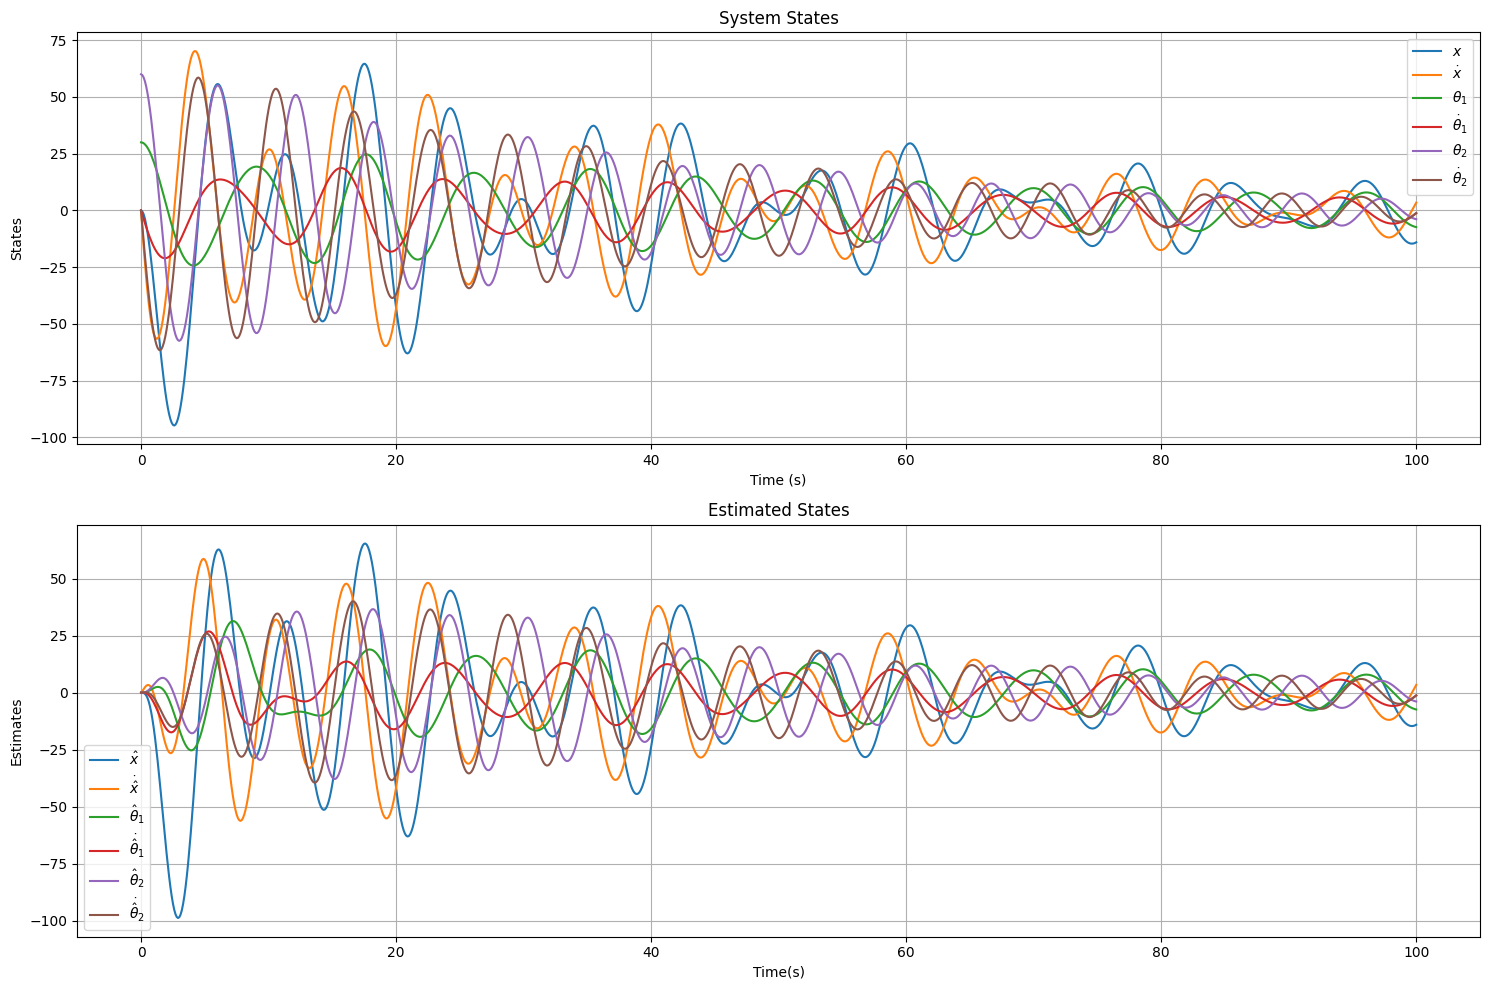

In [9]:
# Creating figure for plots
plt.figure(figsize=(15, 10))

# Upper subplot for the system states
plt.subplot(2, 1, 1)
plt.plot(time_span, x[:, :6])
plt.title('System States')
plt.xlabel('Time (s)')
plt.ylabel('States')
plt.legend(['$x$', '$\dot{x}$', '$\\theta_1$', '$\dot{\\theta}_1$', '$\\theta_2$', '$\dot{\\theta}_2$'])
plt.grid(True)

# Lower subplot for the estimated states
plt.subplot(2, 1, 2)
plt.plot(time_span, x[:, 6:12])
plt.title('Estimated States')
plt.xlabel('Time(s)')
plt.ylabel('Estimates')
plt.legend(['$\hat{x}$', '$\dot{\hat{x}}$', '$\hat{\\theta}_1$', '$\dot{\hat{\\theta}}_1$', '$\hat{\\theta}_2$', '$\dot{\hat{\\theta}}_2$'])
plt.grid(True)

plt.tight_layout()
plt.show()

System States (Upper Plot):

- This plot shows six different system states over time, with time represented on the x-axis and the magnitude of the states on the y-axis.
- The states are oscillatory in nature, with no clear pattern of convergence or divergence, suggesting a dynamic system that is undergoing periodic motion or fluctuations.
- All states seem to have a similar frequency but varying amplitudes, which might indicate some form of coupling or interaction between them.

Estimated States (Lower Plot):

- Similar to the system states, the estimated states also exhibit an oscillatory behavior.
- The plot suggests that the estimator is tracking the system states with a similar pattern of oscillation.
- The amplitude and frequency of the estimated states seem to match closely with the actual system states, which imply a good performance of the estimation process.